In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from matplotlib.lines import Line2D 
from scipy.stats import norm

## Read data

### Standard comparison

In [41]:
df_list = []
for i in range(9):
    for j in ['025', '075']:
        df_tmp = pd.read_csv('results_25_10_06/rbf/sim_par_'+str(i+1)+'_'+j+'.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Gaussian'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)
    for j in ['025', '075']:
        if i != 5:
            df_tmp = pd.read_csv('results_25_10_06/laplacian/sim_par_'+str(i+1)+'_'+j+'.csv')
            if i < 3:
                df_tmp['x'] = df_tmp['n_target']
                df_tmp['x_name'] = 'n_target, n_source=300'
            if i >= 3 and i < 6: 
                df_tmp['x'] = df_tmp['n_target']
                df_tmp['x_name'] = 'n_target=n_source'
            if i >= 6 and i < 9: 
                df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
                df_tmp['x_name'] = 'n_source, n_target=300'
            df_tmp['p'] = 5
            df_tmp['distributions'] = 'Gaussian'
            df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
            df_tmp.pop('estimator_name')
            df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
            df_list.append(df_tmp)
    
df = pd.concat(df_list, ignore_index=True)
df["method_name"] = df["method_name"].astype(str).str.strip()


In [42]:
sim_params_colnames = ['sim_scenario', 'n_plus', 'n_minus', 'n_target', 'pi_target', 
                       'gamma_selection_name', 'estimator', 'type', 'kernel',
                        'x', 'x_name', 'p', 'distributions', 'method_name']
values_colnames = ['pi', 'var_n', 'var', 'gamma', 'MSE', 'time', 'count_sim']

In [43]:
df = df.drop_duplicates(sim_params_colnames+['seed'], keep='last')

In [44]:
df['count_sim'] = 1

#### Check if all computed

In [45]:
df_tmp = df.groupby(sim_params_colnames).count()['pi'].reset_index()

In [46]:
# df[(df['kernel'] == 'rbf') & (df['type'] == 'V')  & (df['sim_scenario'] == 'sim_par_2') & (df['pi_target'] == 0.75) ].groupby('seed').count()['pi']

In [47]:
# np.where(df[(df['kernel'] == 'rbf') & (df['type'] == 'V')  & (df['sim_scenario'] == 'sim_par_2') ].groupby('seed').count()['pi'] < 14)

In [48]:
# df[(df['kernel'] == 'rbf') & (df['type'] == 'U')].groupby(['sim_scenario']).count()['pi']

In [49]:
# df[(df['kernel'] == 'rbf') & (df['type'] == 'U') & (df['pi_target'] == 0.25)].groupby(['sim_scenario']).count()['pi']

In [50]:
# df[(df['kernel'] == 'rbf') & (df['type'] == 'V') & (df['pi_target'] == 0.25)].groupby(['sim_scenario']).count()['pi']

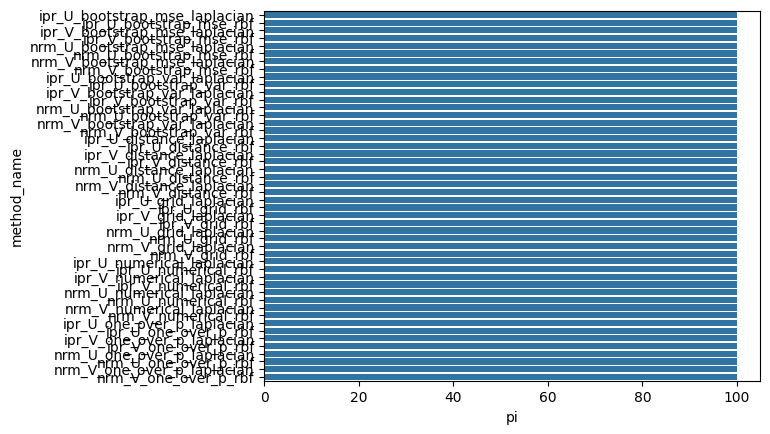

In [51]:
sns.barplot(df_tmp, x='pi', y='method_name', errorbar = 'sd')
plt.show()

#### save

In [52]:
df = df[sim_params_colnames+values_colnames]

#### ipr

In [53]:
methods_ipr = ['nrm_U_one_over_p_rbf',
 'nrm_V_one_over_p_rbf',
 'ipr_U_one_over_p_rbf',
 'ipr_V_one_over_p_rbf',
 'ipr_U_numerical_rbf',
 'ipr_U_grid_rbf',
 'ipr_U_bootstrap_var_rbf',
 'ipr_U_bootstrap_mse_rbf',
 'ipr_U_distance_rbf',
 'ipr_V_distance_rbf',
 'ipr_V_numerical_rbf',
 'ipr_V_grid_rbf',
 'ipr_V_bootstrap_var_rbf',
 'ipr_V_bootstrap_mse_rbf',
 'nrm_U_one_over_p_laplacian',
 'nrm_V_one_over_p_laplacian',
 'ipr_U_one_over_p_laplacian',
 'ipr_V_one_over_p_laplacian',
 'ipr_U_numerical_laplacian',
 'ipr_U_grid_laplacian',
 'ipr_U_bootstrap_var_laplacian',
 'ipr_U_bootstrap_mse_laplacian',
 'ipr_U_distance_laplacian',
 'ipr_V_distance_laplacian',
 'ipr_V_numerical_laplacian',
 'ipr_V_grid_laplacian',
 'ipr_V_bootstrap_var_laplacian',
 'ipr_V_bootstrap_mse_laplacian']

In [54]:
df0 = df[df['method_name'].isin(methods_ipr)]

In [55]:
df_mse0 = copy.copy(df0)
df_mse0 = df_mse0[sim_params_colnames+['MSE']].groupby(sim_params_colnames).agg('mean').reset_index()

In [56]:
df_mse0['count_sim'] = df0[sim_params_colnames+['count_sim']].groupby(sim_params_colnames).agg('sum').reset_index()['count_sim']

In [57]:
df_mse0 = df_mse0.sort_values(by=["pi_target", "sim_scenario"])
df_mse0['facet_blocks'] = df_mse0['sim_scenario'] + ", pi_target = " + df_mse0['pi_target'].astype(str)

In [58]:
df_mse0['count_sim'].unique()

array([100])

In [59]:
df0.to_csv('results/results_standard_all_ipr_new.csv')
df_mse0.to_csv('results/results_standard_mse_ipr_new.csv')

#### nrm

In [60]:
methods_nrm = ['ipr_U_one_over_p_rbf',
 'ipr_V_one_over_p_rbf',
 'nrm_U_one_over_p_rbf',
 'nrm_V_one_over_p_rbf',
 'nrm_U_numerical_rbf',
 'nrm_U_grid_rbf',
 'nrm_U_bootstrap_var_rbf',
 'nrm_U_bootstrap_mse_rbf',
 'nrm_U_distance_rbf',
 'nrm_V_distance_rbf',
 'nrm_V_numerical_rbf',
 'nrm_V_grid_rbf',
 'nrm_V_bootstrap_var_rbf',
 'nrm_V_bootstrap_mse_rbf',
 'ipr_U_one_over_p_laplacian',
 'ipr_V_one_over_p_laplacian',
 'nrm_U_one_over_p_laplacian',
 'nrm_V_one_over_p_laplacian',
 'nrm_U_numerical_laplacian',
 'nrm_U_grid_laplacian',
 'nrm_U_bootstrap_var_laplacian',
 'nrm_U_bootstrap_mse_laplacian',
 'nrm_U_distance_laplacian',
 'nrm_V_distance_laplacian',
 'nrm_V_numerical_laplacian',
 'nrm_V_grid_laplacian',
 'nrm_V_bootstrap_var_laplacian',
 'nrm_V_bootstrap_mse_laplacian']

In [61]:
df0 = df[df['method_name'].isin(methods_nrm)]

In [62]:
df0['method_name'].unique()

array(['nrm_U_one_over_p_rbf', 'nrm_U_numerical_rbf', 'nrm_U_grid_rbf',
       'nrm_U_bootstrap_var_rbf', 'nrm_U_bootstrap_mse_rbf',
       'nrm_U_distance_rbf', 'nrm_V_one_over_p_rbf',
       'nrm_V_numerical_rbf', 'nrm_V_grid_rbf', 'nrm_V_bootstrap_var_rbf',
       'nrm_V_bootstrap_mse_rbf', 'nrm_V_distance_rbf',
       'ipr_U_one_over_p_rbf', 'ipr_V_one_over_p_rbf',
       'nrm_U_one_over_p_laplacian', 'nrm_U_numerical_laplacian',
       'nrm_U_grid_laplacian', 'nrm_U_bootstrap_var_laplacian',
       'nrm_U_bootstrap_mse_laplacian', 'nrm_U_distance_laplacian',
       'nrm_V_one_over_p_laplacian', 'nrm_V_numerical_laplacian',
       'nrm_V_grid_laplacian', 'nrm_V_bootstrap_var_laplacian',
       'nrm_V_bootstrap_mse_laplacian', 'nrm_V_distance_laplacian',
       'ipr_U_one_over_p_laplacian', 'ipr_V_one_over_p_laplacian'],
      dtype=object)

In [63]:
df_mse0 = copy.copy(df0)
df_mse0 = df_mse0[sim_params_colnames+['MSE']].groupby(sim_params_colnames).agg('mean').reset_index()

In [64]:
df_mse0['count_sim'] = df0[sim_params_colnames+['count_sim']].groupby(sim_params_colnames).agg('sum').reset_index()['count_sim']

In [65]:
df_mse0 = df_mse0.sort_values(by=["pi_target", "sim_scenario"])
df_mse0['facet_blocks'] = df_mse0['sim_scenario'] + ", pi_target = " + df_mse0['pi_target'].astype(str)

In [66]:
df_mse0['count_sim'].unique()

array([100])

In [67]:
df0.to_csv('results/results_standard_all_nrm_new.csv')
df_mse0.to_csv('results/results_standard_mse_nrm_new.csv')

#### all

In [68]:
df_mse = copy.copy(df)
df_mse = df_mse[sim_params_colnames+['MSE']].groupby(sim_params_colnames).agg('mean').reset_index()

In [69]:
df_mse['count_sim'] = df[sim_params_colnames+['count_sim']].groupby(sim_params_colnames).agg('sum').reset_index()['count_sim']

In [70]:
df_mse = df_mse.sort_values(by=["pi_target", "sim_scenario"])
df_mse['facet_blocks'] = df_mse['sim_scenario'] + ", pi_target = " + df_mse['pi_target'].astype(str)

In [71]:
df.to_csv('results/results_standard_all_new.csv')
df_mse.to_csv('results/results_standard_mse_new.csv')

### Dimension - comparison

In [73]:
df_list = []
for i in range(9):
    for j in ['025', '075']:
        if i >= 3 and i < 6: 
            df_tmp = pd.read_csv('results_25_10_06/rbf/sim_par_'+str(i+1)+'_'+j+'.csv')
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
            df_tmp['p'] = 5
            df_tmp['distributions'] = 'Gaussian'
            df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
            df_tmp.pop('estimator_name')
            df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
            df_list.append(df_tmp)
    for j in ['025', '075']:
        if i >= 3 and i < 6: 
            df_tmp = pd.read_csv('results_25_10_06/rbf/sim_par_'+str(i+1)+'-p-10'+'_'+j+'.csv')
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
            df_tmp['p'] = 10
            df_tmp['distributions'] = 'Gaussian'
            df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
            df_tmp.pop('estimator_name')
            df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
            df_list.append(df_tmp)
    for j in ['025', '075']:
        if i >= 3 and i < 6: 
            df_tmp = pd.read_csv('results_25_10_06/rbf/sim_par_'+str(i+1)+'-p-20'+'_'+j+'.csv')
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
            df_tmp['p'] = 20
            df_tmp['distributions'] = 'Gaussian'
            df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
            df_tmp.pop('estimator_name')
            df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
            df_list.append(df_tmp)

    for j in ['025', '075']:
        if i >= 3 and i < 6: 
            df_tmp = pd.read_csv('results_25_10_06/laplacian/sim_par_'+str(i+1)+'_'+j+'.csv')
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
            df_tmp['p'] = 5
            df_tmp['distributions'] = 'Gaussian'
            df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
            df_tmp.pop('estimator_name')
            df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
            df_list.append(df_tmp)
    for j in ['025', '075']:
        if i >= 3 and i < 6: 
            df_tmp = pd.read_csv('results_25_10_06/laplacian/sim_par_'+str(i+1)+'-p-10'+'_'+j+'.csv')
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
            df_tmp['p'] = 10
            df_tmp['distributions'] = 'Gaussian'
            df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
            df_tmp.pop('estimator_name')
            df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
            df_list.append(df_tmp)
    for j in ['025', '075']:
        if i >= 3 and i < 6: 
            df_tmp = pd.read_csv('results_25_10_06/laplacian/sim_par_'+str(i+1)+'-p-20'+'_'+j+'.csv')
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
            df_tmp['p'] = 20
            df_tmp['distributions'] = 'Gaussian'
            df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
            df_tmp.pop('estimator_name')
            df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
            df_list.append(df_tmp)
   
    
df = pd.concat(df_list, ignore_index=True)
df["method_name"] = df["method_name"].astype(str).str.strip()


In [74]:
df['count_sim'] = 1

In [75]:
df['sim_scenario'] = [df.loc[i, 'sim_scenario'].split('-')[0] for i in range(len(df))]

In [76]:
df = df.drop_duplicates(sim_params_colnames+['seed'], keep='last')

In [77]:
df['sim_scenario'].unique()

array(['sim_par_4', 'sim_par_5', 'sim_par_6'], dtype=object)

In [79]:
df_tmp = df.groupby(sim_params_colnames).count()['pi'].reset_index()

In [80]:
df[(df['kernel'] == 'rbf') & (df['type'] == 'V')  & (df['sim_scenario'] == 'sim_par_4') & (df['pi_target'] == 0.75) & (df['p'] == 20) ].groupby('seed').count()['pi']

seed
0     60
1     60
2     60
3     60
4     60
      ..
95    60
96    60
97    60
98    60
99    60
Name: pi, Length: 100, dtype: int64

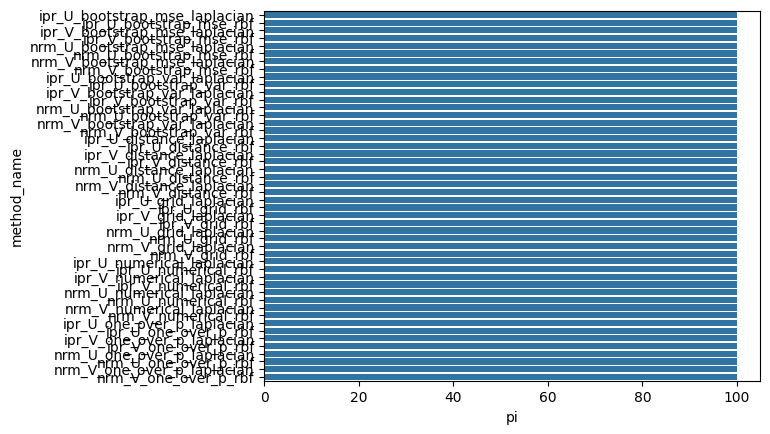

In [81]:
sns.barplot(df_tmp, x='pi', y='method_name', errorbar = 'sd')
plt.show()

In [82]:
df_mse = copy.copy(df)
df_mse = df_mse[sim_params_colnames+['MSE']].groupby(sim_params_colnames).agg('mean').reset_index()

df_mse = df_mse.sort_values(by=["pi_target", "sim_scenario", 'p'])
df_mse['facet_blocks'] = 'p = '+df_mse['p'].astype(str) + ", " + df_mse['sim_scenario'] + ", pi_target = " + df_mse['pi_target'].astype(str)

In [83]:
df.to_csv('results/results_dimension_all_new.csv')
df_mse.to_csv('results/results_dimension_mse_new.csv')

### Cauchy - comparison

In [85]:
df_list = []
for i in [3]:#[0,1,3,4,6,7]:
    for j in ['025', '075']:
        df_tmp = pd.read_csv('results_25_10_06/rbf/sim_par_'+str(i+1)+'_'+j+'.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Gaussian'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)
    for j in ['025', '075']:
        df_tmp = pd.read_csv('results_25_10_06/rbf/sim_par_'+str(i+1)+'-Cauchy_'+j+'.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Cauchy'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)

    for j in ['025', '075']:
        df_tmp = pd.read_csv('results_25_10_06/laplacian/sim_par_'+str(i+1)+'_'+j+'.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Gaussian'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)
    for j in ['025', '075']:
        df_tmp = pd.read_csv('results_25_10_06/laplacian/sim_par_'+str(i+1)+'-Cauchy_'+j+'.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Cauchy'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)
   
    
df = pd.concat(df_list, ignore_index=True)
df["method_name"] = df["method_name"].astype(str).str.strip()


In [86]:
df['count_sim'] = 1

In [87]:
df['sim_scenario'] = [df.loc[i, 'sim_scenario'].split('-')[0] for i in range(len(df))]

In [88]:
df = df.drop_duplicates(sim_params_colnames+['seed'], keep='last')

In [89]:
df['sim_scenario'].unique()

array(['sim_par_4'], dtype=object)

In [90]:
df_tmp = df.groupby(sim_params_colnames).count()['pi'].reset_index()

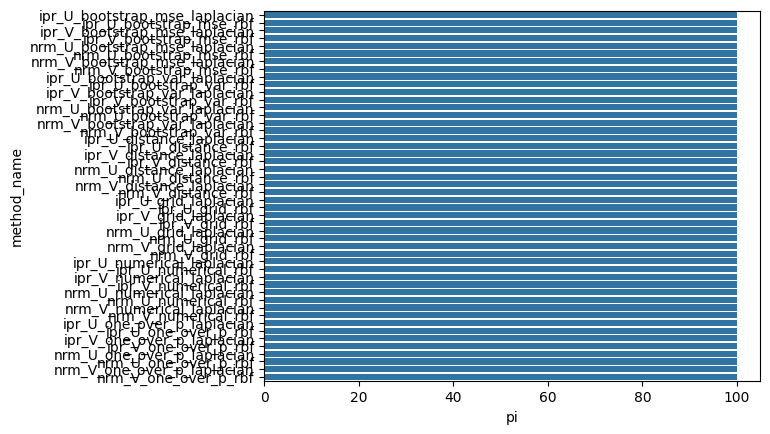

In [91]:
sns.barplot(df_tmp, x='pi', y='method_name', errorbar = 'sd')
plt.show()

In [92]:
df_mse = copy.copy(df)
df_mse = df_mse[sim_params_colnames+['MSE']].groupby(sim_params_colnames).agg('mean').reset_index()

df_mse = df_mse.sort_values(by=["pi_target", "sim_scenario", 'p'])
df_mse['facet_blocks'] = 'Distribution: '+df_mse['distributions'].astype(str) + ", pi_target = " + df_mse['pi_target'].astype(str) + ", " + df_mse['sim_scenario']

In [93]:
df.to_csv('results/results_heavy_tail_all_new.csv')
df_mse.to_csv('results/results_heavy_tail_mse_new.csv')

In [38]:
np.zeros(0)

array([], dtype=float64)